# **Datos transformadores**

In [2]:
import pandas as pd

# Lee el archivo CSV
df_transformadores = pd.read_csv('df_rellenado_con_nans.csv')

# Muestra las primeras filas del DataFrame
df_transformadores.head()

,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),...,SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),estacion,estacion_2
0,2021-01-01 00:30:00,6657.061100,392.181486,9087.688446,-89.524969,9393.958092,1439.777136,8747.844727,-132.386734,4363.275051,...,8986.115234,1787.867920,14563.25817,1948.054075,8607.710838,1346.077800,7858.459949,467.431158,verano,verano
1,2021-01-01 00:45:00,6600.084782,370.762348,9007.225990,-48.079155,9353.917122,1430.533409,8626.563477,-140.524490,4372.547626,...,8946.944336,1806.897827,14303.06339,2033.608913,8421.904564,1292.887449,7973.084927,486.736864,verano,verano
2,2021-01-01 01:00:00,6579.427719,385.641813,8908.111572,-71.154483,9084.967613,1380.251646,8546.049805,-164.159393,4297.423363,...,8749.440430,1736.990967,14161.10229,2011.147261,8396.206856,1296.282291,7781.050682,708.620131,verano,verano
3,2021-01-01 01:15:00,6523.938179,389.757663,8725.055695,-123.746052,8897.534370,1328.508615,8458.301758,-164.846237,4189.702034,...,8650.058594,1721.460083,14255.73540,2104.893208,8420.323372,1306.474209,7601.181507,1331.551671,verano,verano
4,2021-01-01 01:30:00,6389.933586,364.311010,8571.299553,-159.668446,8714.198112,1283.114433,8302.192383,-205.847855,4165.856361,...,8527.763672,1702.901367,13911.45802,1989.736915,8410.838127,1365.293384,7718.300819,1400.925994,verano,verano


In [3]:
columnas = [
    'Fecha y hora',
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)',
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)',
    'SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)',  
    'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)',
    'estacion'
]

df_transformadores = df_transformadores[columnas]

df_transformadores['Fecha y hora'] = pd.to_datetime(df_transformadores['Fecha y hora'])


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os

transformador_columnas_p = [
 "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
 "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)"
]
    
  
#potencia reactiva
transformador_columnas_q = [
 "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)",  
 "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)",    
]

In [5]:
# Unir ambas listas de columnas
columnas_a_convertir = transformador_columnas_p + transformador_columnas_q

# Aplicar la conversión: dividir por 1000
df_transformadores[columnas_a_convertir] = df_transformadores[columnas_a_convertir] / 1000

In [6]:
df_transformadores.head()

,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),estacion
0,2021-01-01 00:30:00,6.657061,14.563258,0.392181,1.948054,verano
1,2021-01-01 00:45:00,6.600085,14.303063,0.370762,2.033609,verano
2,2021-01-01 01:00:00,6.579428,14.161102,0.385642,2.011147,verano
3,2021-01-01 01:15:00,6.523938,14.255735,0.389758,2.104893,verano
4,2021-01-01 01:30:00,6.389934,13.911458,0.364311,1.989737,verano


In [7]:
df_transformadores['Fecha y hora'] = pd.to_datetime(df_transformadores['Fecha y hora'])

# Mostrar la fecha mínima y máxima
fecha_min = df_transformadores['Fecha y hora'].min()
fecha_max = df_transformadores['Fecha y hora'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)


Fecha mínima: 2021-01-01 00:30:00
Fecha máxima: 2025-04-21 00:00:00


In [8]:
# Definir las fechas de inicio y fin
fecha_inicio = pd.to_datetime('2023-06-24 00:00:00')
fecha_fin = pd.to_datetime('2025-04-08 00:00:00')

# Filtrar el DataFrame para que solo contenga registros entre fecha_inicio y fecha_fin
df_transformadores = df_transformadores[(df_transformadores['Fecha y hora'] >= fecha_inicio) & (df_transformadores['Fecha y hora'] <= fecha_fin)]

In [9]:
df_transformadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62785 entries, 86782 to 149566
Data columns (total 6 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Fecha y hora                                                    62785 non-null  datetime64[ns]
 1   SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)      62785 non-null  float64       
 2   SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)      62785 non-null  float64       
 3   SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)  62785 non-null  float64       
 4   SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)  62785 non-null  float64       
 5   estacion                                                        62785 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.4+ MB


# **Leer data meteorologica**

In [11]:
import pandas as pd

# Lee el archivo CSV con separador ;
df_meteorologico = pd.read_csv('df_meteorologico.csv', sep=';')

# Muestra las primeras filas del DataFrame
df_meteorologico.head()

,Date & Time,Estacion,Temp - °C,Velocidad del Viento Media - km/h,Hum - %,Barómetro - mb,Lluvia - mm,Días-grado de enfriamiento,Días-grado de calentamiento,Estacion_Anual
0,2023-06-24 00:00:00,Los Andes,12.0,0.0,93.0,1023.0,0.6,0.0,0.123,invierno
1,2023-06-24 00:00:00,Baron,16.0,6.0,92.0,1018.4,0.3,0.0,0.021,invierno
2,2023-06-24 00:00:00,Curauma,15.0,0.0,98.0,1020.8,0.0,0.0,0.039,invierno
3,2023-06-24 00:00:00,La Cruz,17.0,1.0,84.0,1020.5,0.0,0.0,0.012,invierno
4,2023-06-24 00:15:00,Curauma,15.0,1.0,98.0,1020.6,0.3,0.0,0.038,invierno


In [12]:
#df_meteorologico = df_meteorologico[['Date & Time', 'Temp - °C', 'Estacion']]


In [13]:
df_meteorologico['Date & Time'] = pd.to_datetime(df_meteorologico['Date & Time'])

# Mostrar la fecha mínima y máxima
fecha_min = df_meteorologico['Date & Time'].min()
fecha_max = df_meteorologico['Date & Time'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)

Fecha mínima: 2023-06-24 00:00:00
Fecha máxima: 2025-04-08 00:00:00


## Leer data meteorologica Andes

In [15]:
df_meteorologico_andes = pd.read_csv(
    'temperatura_los_andes_formateada_con_guiones.csv',
    sep=';',
    encoding='latin1',
    parse_dates=['Date & Time'],
    dayfirst=False  #fecha en orden año-mes-día
)
# Muestra las primeras filas del DataFrame
df_meteorologico_andes.head()

,Date & Time,Temp - °C,Estacion
0,2022-09-01 00:00:00,5.65,Los Andes
1,2022-09-01 00:15:00,5.65,Los Andes
2,2022-09-01 00:30:00,5.65,Los Andes
3,2022-09-01 00:45:00,5.65,Los Andes
4,2022-09-01 01:00:00,5.35,Los Andes


In [16]:
import pandas as pd

# Definir columnas necesarias
columnas_deseadas = ['Date & Time', 'Temp - °C', 'Estacion']

# Limpiar nombres de columnas por si tienen espacios extra
df_meteorologico.columns = df_meteorologico.columns.str.strip()
df_meteorologico_andes.columns = df_meteorologico_andes.columns.str.strip()

# Filtrar registros de Los Andes y seleccionar solo las columnas deseadas
df_andes_filtrado = df_meteorologico[df_meteorologico['Estacion'] == 'Los Andes'][columnas_deseadas].copy()
df_meteorologico_andes = df_meteorologico_andes[columnas_deseadas].copy()

# Convertir 'Date & Time' a datetime
df_andes_filtrado['Date & Time'] = pd.to_datetime(df_andes_filtrado['Date & Time'], dayfirst=True, errors='coerce')

df_meteorologico_andes['Date & Time'] = pd.to_datetime(df_meteorologico_andes['Date & Time'], errors='coerce')

# Concatenar los dos DataFrames
df_andes_union = pd.concat([df_andes_filtrado, df_meteorologico_andes], ignore_index=True)

# Eliminar duplicados por 'Date & Time' haciendo la media de temperatura
df_andes_union = df_andes_union.groupby('Date & Time', as_index=False).agg({
    'Temp - °C': 'mean',
    'Estacion': 'first'  # Siempre será 'Los Andes'
})

# Mostrar resultados
print(f'Registros después de la unión: {len(df_andes_union)}')
print(df_andes_union.head())



Registros después de la unión: 91201
          Date & Time  Temp - °C   Estacion
0 2022-09-01 00:00:00       5.65  Los Andes
1 2022-09-01 00:15:00       5.65  Los Andes
2 2022-09-01 00:30:00       5.65  Los Andes
3 2022-09-01 00:45:00       5.65  Los Andes
4 2022-09-01 01:00:00       5.35  Los Andes


In [17]:
fecha_min = df_andes_union['Date & Time'].min()
fecha_max = df_andes_union['Date & Time'].max()

print(f'Fecha mínima: {fecha_min}')
print(f'Fecha máxima: {fecha_max}')


Fecha mínima: 2022-09-01 00:00:00
Fecha máxima: 2025-04-08 00:00:00


In [18]:
df_andes_union.head()

,Date & Time,Temp - °C,Estacion
0,2022-09-01 00:00:00,5.65,Los Andes
1,2022-09-01 00:15:00,5.65,Los Andes
2,2022-09-01 00:30:00,5.65,Los Andes
3,2022-09-01 00:45:00,5.65,Los Andes
4,2022-09-01 01:00:00,5.35,Los Andes


In [19]:
# Mostrar la fecha mínima y máxima
fecha_min = df_andes_union['Date & Time'].min()
fecha_max = df_andes_union['Date & Time'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)

Fecha mínima: 2022-09-01 00:00:00
Fecha máxima: 2025-04-08 00:00:00


# **Instalación de librerias**

In [21]:
!pip install prophet

In [22]:
from prophet import Prophet
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Leer data transformadores**

## Mejor modelo para P

In [25]:
def calcular_mape(y_true, y_pred, min_denominador=1.0):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true >= min_denominador
    if np.any(mask):
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        return np.nan

In [26]:
def ejecutar_modelo_prophet_parametros_meteo(df, columna_objetivo, fecha_inicio_test, df_meteorologico, nombre_estacion):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna_objetivo]].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna_objetivo: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Cargar temperatura desde estación meteorológica
    df_meteo = df_meteorologico[df_meteorologico['Estacion'] == nombre_estacion].copy()
    df_meteo['Date & Time'] = pd.to_datetime(df_meteo['Date & Time'])

    df_prophet = df_prophet.merge(
        df_meteo[['Date & Time', 'Temp - °C']],
        left_on='ds', right_on='Date & Time', how='left'
    ).drop(columns=['Date & Time'])

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Filtrar segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet con valores por defecto
    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        uncertainty_samples=0
    )
    m.add_regressor('Temp - °C')

    # Entrenar modelo
    m.fit(df_train[['ds', 'y', 'Temp - °C']])

    # Construir future
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds', 'Temp - °C']], on='ds', how='left')

    # Predecir
    forecast = m.predict(future)

    # Separar resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico test
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna_objetivo} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



Evaluando P para 2025-03-17


20:58:18 - cmdstanpy - INFO - Chain [1] start processing
20:58:32 - cmdstanpy - INFO - Chain [1] done processing


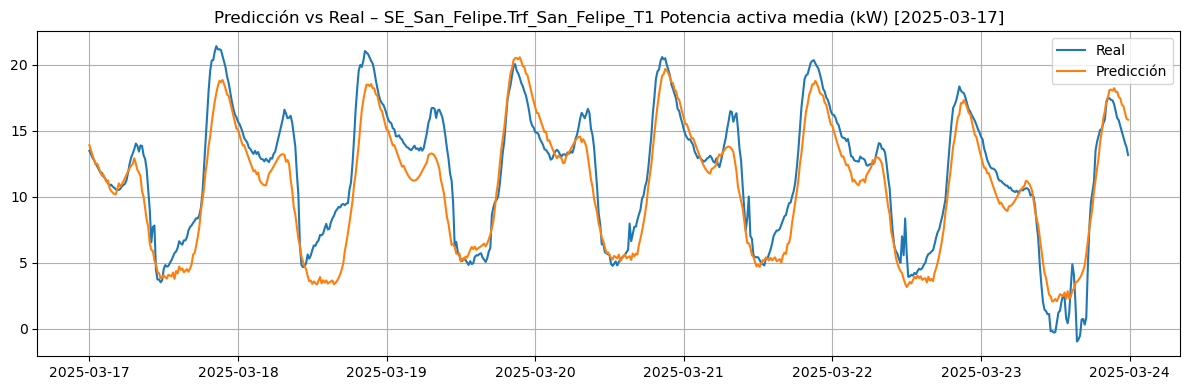


Evaluando Q para 2025-03-17


20:58:33 - cmdstanpy - INFO - Chain [1] start processing
20:58:45 - cmdstanpy - INFO - Chain [1] done processing


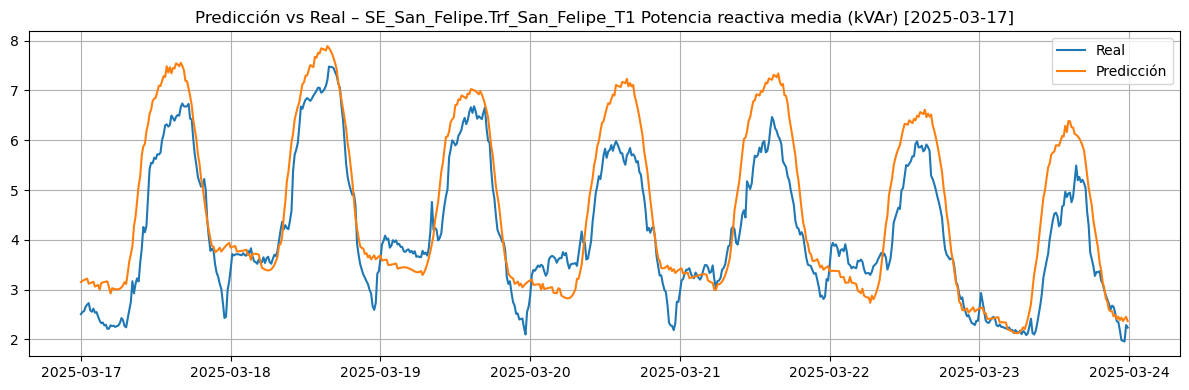


Evaluando P para 2025-01-13


20:58:46 - cmdstanpy - INFO - Chain [1] start processing
20:58:54 - cmdstanpy - INFO - Chain [1] done processing


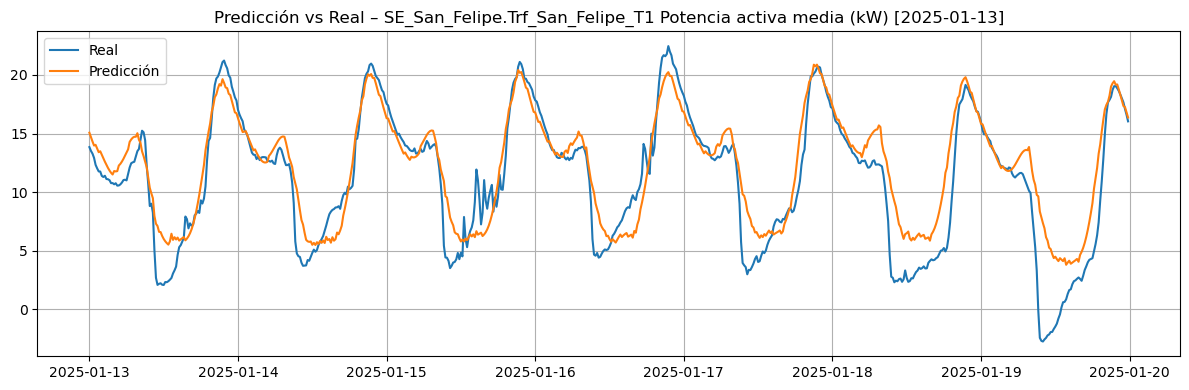


Evaluando Q para 2025-01-13


20:58:55 - cmdstanpy - INFO - Chain [1] start processing
20:59:03 - cmdstanpy - INFO - Chain [1] done processing


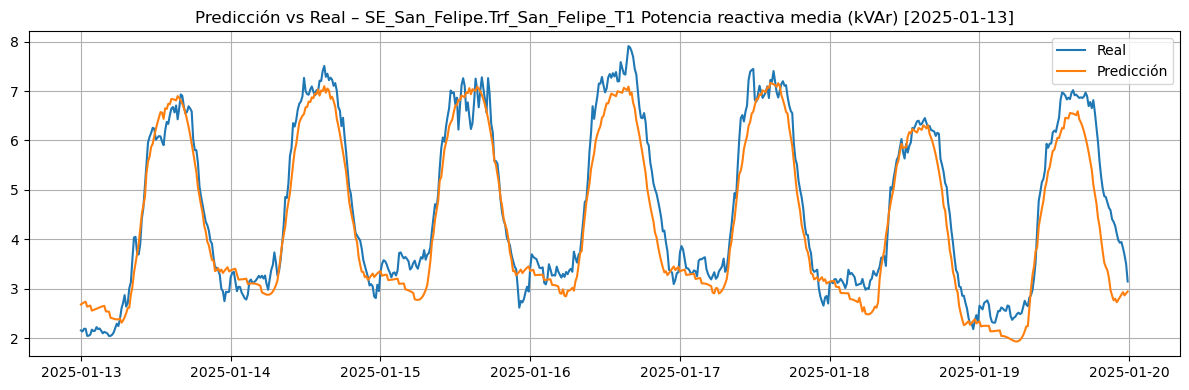


Evaluando P para 2024-10-21


20:59:03 - cmdstanpy - INFO - Chain [1] start processing
20:59:13 - cmdstanpy - INFO - Chain [1] done processing


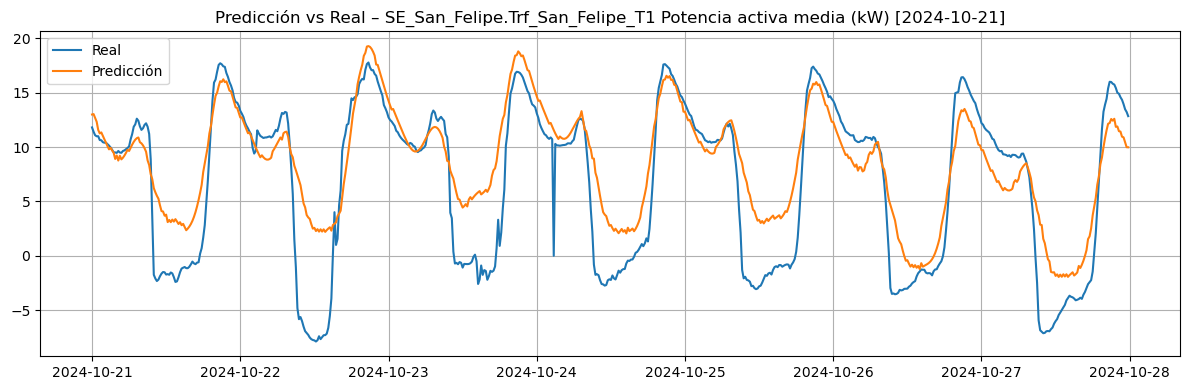


Evaluando Q para 2024-10-21


20:59:14 - cmdstanpy - INFO - Chain [1] start processing
20:59:23 - cmdstanpy - INFO - Chain [1] done processing


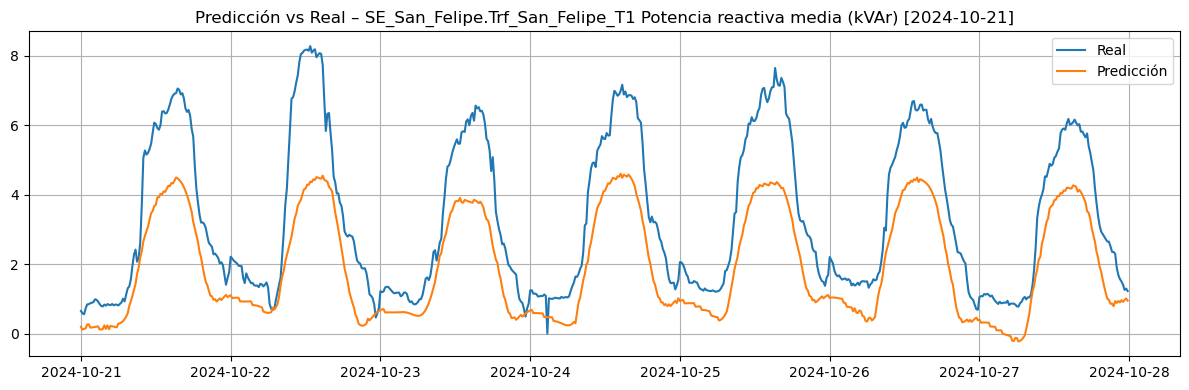


Evaluando P para 2024-07-10


20:59:24 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing


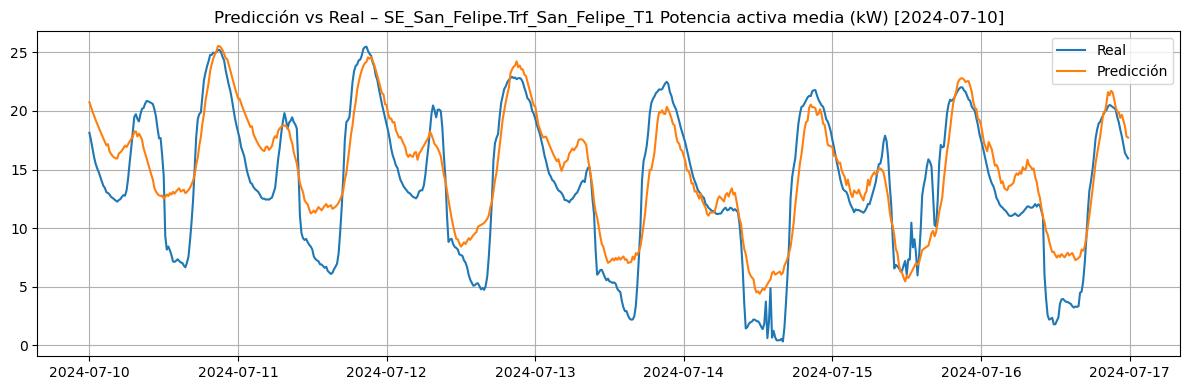


Evaluando Q para 2024-07-10


20:59:26 - cmdstanpy - INFO - Chain [1] start processing
20:59:28 - cmdstanpy - INFO - Chain [1] done processing


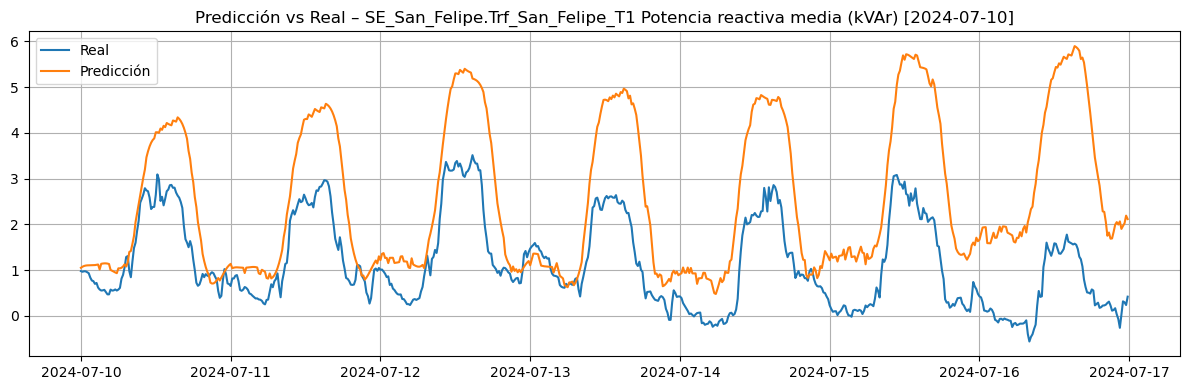


 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.734752    2.129644   21.092971  1.601113   2.036608   
1        2025-01-13   2.100189    2.578207   35.273484  1.793869   2.505090   
2        2024-10-21   3.183765    4.052135   30.052467  3.073852   4.076207   
3        2024-07-10   3.638073    4.716148   23.213972  2.619199   3.106518   

   MAPE_test variable  
0  15.927596        P  
1  28.597336        P  
2  27.290437        P  
3  33.843091        P  

 Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.408692    0.500358    9.558618  0.621012   0.762037   
1        2025-01-13   0.689921    0.773786   17.655948  0.396625   0.494538   
2        2024-10-21   0.423090    0.540254   21.441382  1.383987   1.611841   
3        2024-07-10   0.654683    0.896638   39.822404  1.403310   1.748079   

   MAPE_test varia

In [27]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'
columna_q = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'

# Nombre de estación meteorológica asociada al transformador
nombre_estacion = 'Los Andes'

# Resultados
resultados_p = []
resultados_q = []

for fecha in fechas_test:
    print(f"\nEvaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_parametros_meteo(
        df_transformadores, columna_p, fecha, df_meteorologico, nombre_estacion
    )
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

    print(f"\nEvaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet_parametros_meteo(
        df_transformadores, columna_q, fecha, df_andes_union, nombre_estacion
    )
    resultado_q['fecha_inicio_test'] = fecha
    resultado_q['variable'] = 'Q'
    resultados_q.append(resultado_q)

# Convertir a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)
df_resultados_q = pd.DataFrame(resultados_q)

# Mostrar resultados
print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
print("\n Resultados Potencia Reactiva (Q):")
print(df_resultados_q)



## Agregar mas variabes meteorologicas

In [29]:
def ejecutar_modelo_prophet_parametros_estacion_meteo(df, columna_objetivo, fecha_inicio_test, df_meteorologico, nombre_estacion):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna_objetivo, 'estacion']].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna_objetivo: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Filtrar estación meteorológica correspondiente
    df_meteo = df_meteorologico[df_meteorologico['Estacion'] == nombre_estacion].copy()
    df_meteo['Date & Time'] = pd.to_datetime(df_meteo['Date & Time'])

    # Seleccionar columnas meteorológicas relevantes
    columnas_meteo = [
        'Date & Time', 'Temp - °C', 'Días-grado de enfriamiento',
        'Hum - %', 'Velocidad del Viento Media - km/h'
    ]
    df_meteo = df_meteo[columnas_meteo]

    # Unir con datos de transformador
    df_prophet = df_prophet.merge(df_meteo, left_on='ds', right_on='Date & Time', how='left')
    df_prophet.drop(columns=['Date & Time'], inplace=True)

    # Renombrar columnas meteorológicas para Prophet
    df_prophet.rename(columns={
        'Temp - °C': 'temp',
        'Días-grado de enfriamiento': 'cooling_degree_days',
        'Hum - %': 'humidity',
        'Velocidad del Viento Media - km/h': 'wind_speed'
    }, inplace=True)

    # Crear dummies de estación (primavera, verano...)
    dummies_estacion = pd.get_dummies(df_prophet['estacion'], prefix='estacion')
    df_prophet = pd.concat([df_prophet, dummies_estacion], axis=1)

    # Definir regresores
    regresores = ['temp', 'cooling_degree_days', 'humidity', 'wind_speed'] + dummies_estacion.columns.tolist()

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Segmentos de datos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet
    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        uncertainty_samples=0
    )

    for reg in regresores:
        m.add_regressor(reg)

    m.fit(df_train[['ds', 'y'] + regresores])

    # Construir future
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds'] + regresores], on='ds', how='left')

    # Predecir
    forecast = m.predict(future)

    # Resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna_objetivo} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



 Evaluando P para 2025-03-17


20:59:29 - cmdstanpy - INFO - Chain [1] start processing
20:59:42 - cmdstanpy - INFO - Chain [1] done processing


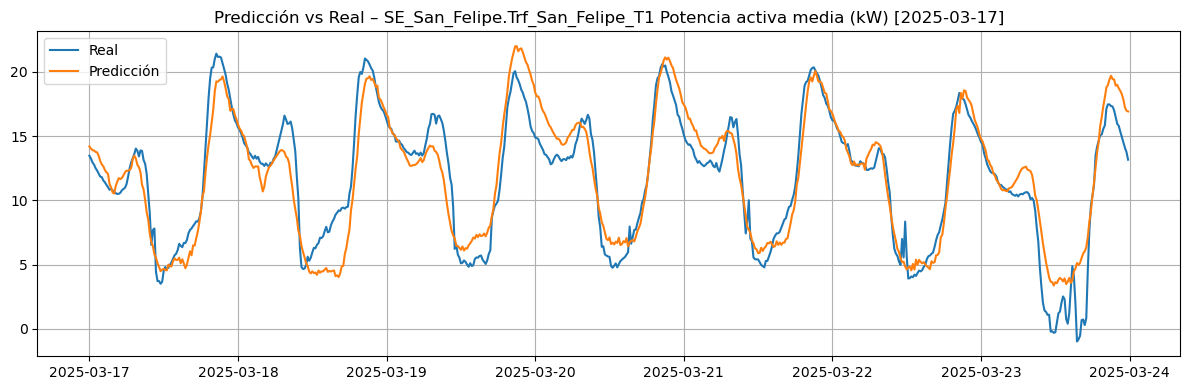


 Evaluando P para 2025-01-13


20:59:43 - cmdstanpy - INFO - Chain [1] start processing
20:59:54 - cmdstanpy - INFO - Chain [1] done processing


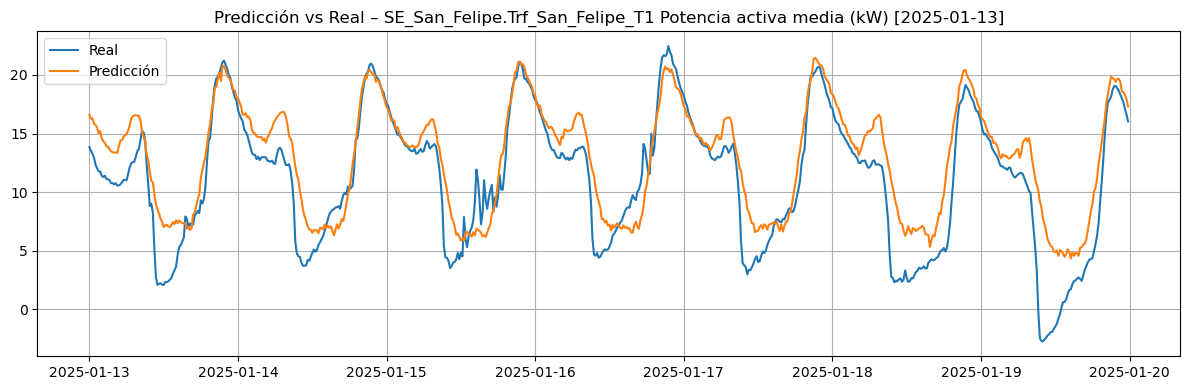


 Evaluando P para 2024-10-21


20:59:55 - cmdstanpy - INFO - Chain [1] start processing
21:00:06 - cmdstanpy - INFO - Chain [1] done processing


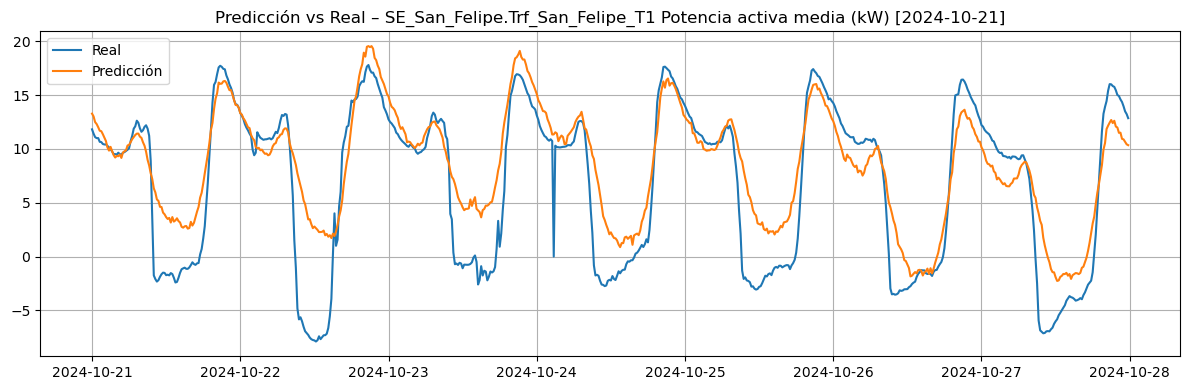


 Evaluando P para 2024-07-10


21:00:07 - cmdstanpy - INFO - Chain [1] start processing
21:00:08 - cmdstanpy - INFO - Chain [1] done processing


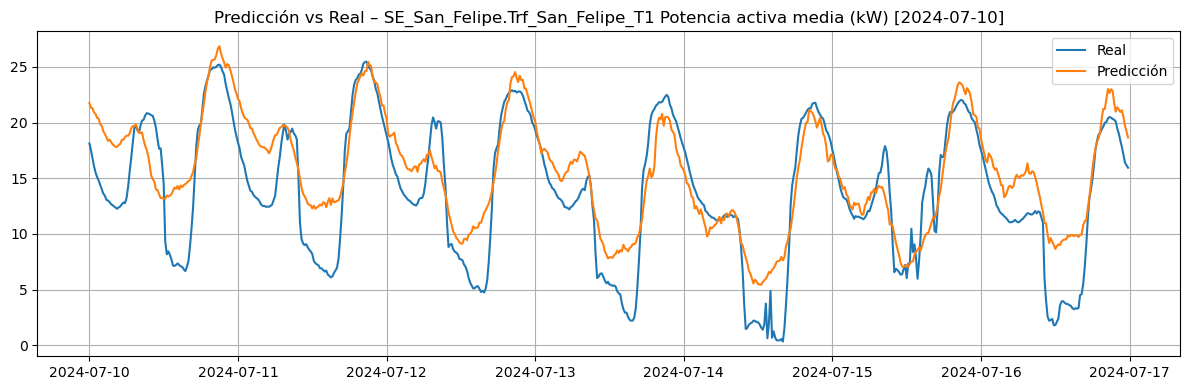


Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.630079    2.041698   20.339740  1.482425   1.897418   
1        2025-01-13   2.038283    2.561782   35.404308  2.209247   2.909527   
2        2024-10-21   3.278360    4.298587   31.052542  2.877446   3.883606   
3        2024-07-10   3.372893    4.459494   21.759732  2.826807   3.479825   

   MAPE_test variable  
0  16.764709        P  
1  34.982692        P  
2  24.336914        P  
3  39.580959        P  


In [30]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columna objetivo (Potencia activa)
columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'

# Estación meteorológica asociada
nombre_estacion = 'Los Andes'

# Lista de resultados
resultados_p = []

# Loop por fecha
for fecha in fechas_test:
    print(f"\n Evaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_parametros_estacion_meteo(
        df_transformadores,
        columna_objetivo=columna_p,
        fecha_inicio_test=fecha,
        df_meteorologico=df_meteorologico,
        nombre_estacion=nombre_estacion
    )
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

# Convertir a DataFrame
df_resultados_p = pd.DataFrame(resultados_p)

# Mostrar resultados
print("\nResultados Potencia Activa (P):")
print(df_resultados_p)


## Componentes cíclicos de hora y día de la semana 

In [32]:
def ejecutar_modelo_prophet_parametros_estacion_meteo_componentes(df, columna_objetivo, fecha_inicio_test, df_meteorologico, nombre_estacion):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna_objetivo, 'estacion']].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna_objetivo: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Añadir temperatura desde df_meteorologico
    df_meteorologico_estacion = df_meteorologico[df_meteorologico['Estacion'] == nombre_estacion].copy()
    df_meteorologico_estacion['Date & Time'] = pd.to_datetime(df_meteorologico_estacion['Date & Time'])
    df_prophet = df_prophet.merge(df_meteorologico_estacion[['Date & Time', 'Temp - °C']],
                                  left_on='ds', right_on='Date & Time', how='left').drop(columns=['Date & Time'])
    df_prophet.rename(columns={'Temp - °C': 'temp'}, inplace=True)

    # Codificación cíclica de hora y día
    df_prophet['hora'] = df_prophet['ds'].dt.hour
    df_prophet['dia_semana'] = df_prophet['ds'].dt.weekday  # lunes=0, domingo=6
    df_prophet['hora_sin'] = np.sin(2 * np.pi * df_prophet['hora'] / 24)
    df_prophet['hora_cos'] = np.cos(2 * np.pi * df_prophet['hora'] / 24)
    df_prophet['dia_sin'] = np.sin(2 * np.pi * df_prophet['dia_semana'] / 7)
    df_prophet['dia_cos'] = np.cos(2 * np.pi * df_prophet['dia_semana'] / 7)

    # Dummies de estación (primavera, verano, etc.)
    dummies_estacion = pd.get_dummies(df_prophet['estacion'], prefix='estacion')
    df_prophet = pd.concat([df_prophet, dummies_estacion], axis=1)

    # Regresores
    regresores = ['temp', 'hora_sin', 'hora_cos', 'dia_sin', 'dia_cos'] + dummies_estacion.columns.tolist()

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet
    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        uncertainty_samples=0
    )

    for reg in regresores:
        m.add_regressor(reg)

    m.fit(df_train[['ds', 'y'] + regresores])

    # Construir future
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds'] + regresores], on='ds', how='left')

    forecast = m.predict(future)

    # Resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna_objetivo} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



Evaluando P para 2025-03-17


21:00:10 - cmdstanpy - INFO - Chain [1] start processing
21:00:26 - cmdstanpy - INFO - Chain [1] done processing


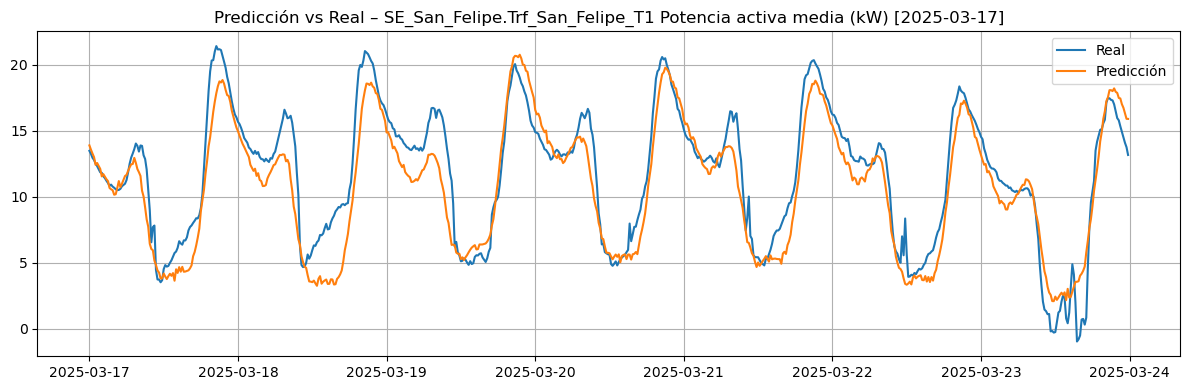


Evaluando P para 2025-01-13


21:00:27 - cmdstanpy - INFO - Chain [1] start processing
21:00:38 - cmdstanpy - INFO - Chain [1] done processing


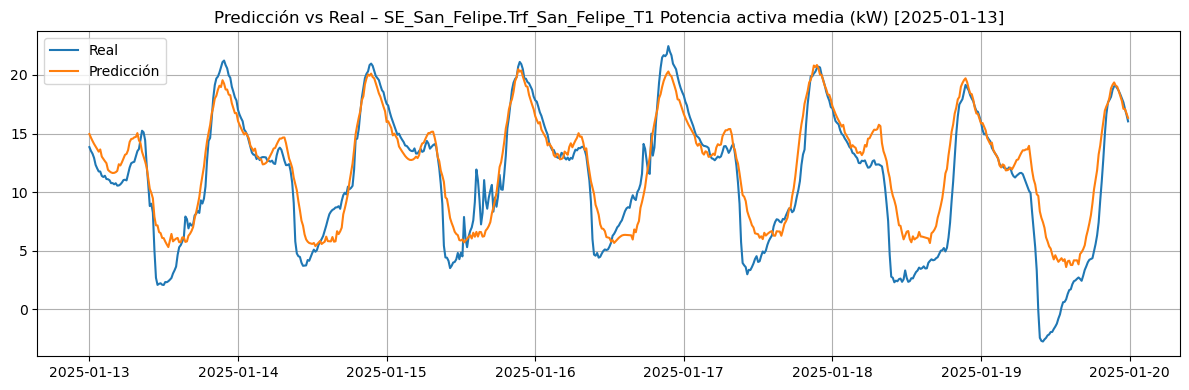


Evaluando P para 2024-10-21


21:00:38 - cmdstanpy - INFO - Chain [1] start processing
21:00:47 - cmdstanpy - INFO - Chain [1] done processing


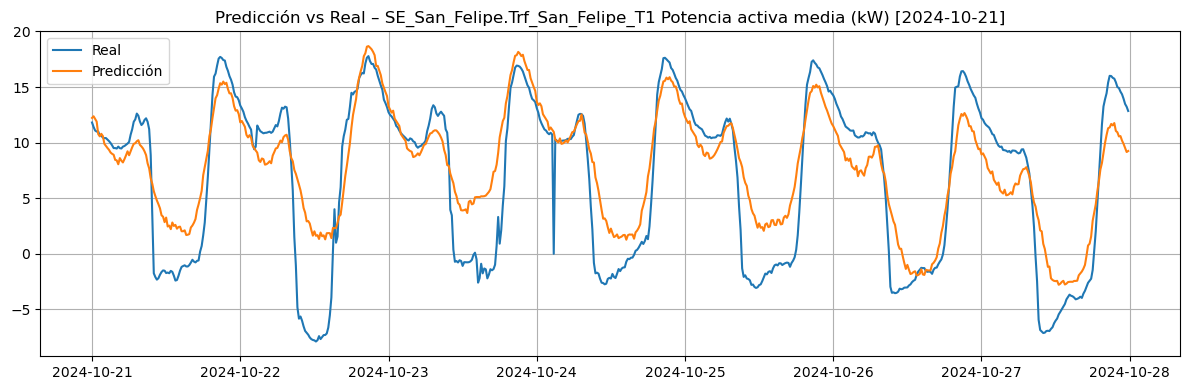


Evaluando P para 2024-07-10


21:00:48 - cmdstanpy - INFO - Chain [1] start processing
21:00:49 - cmdstanpy - INFO - Chain [1] done processing


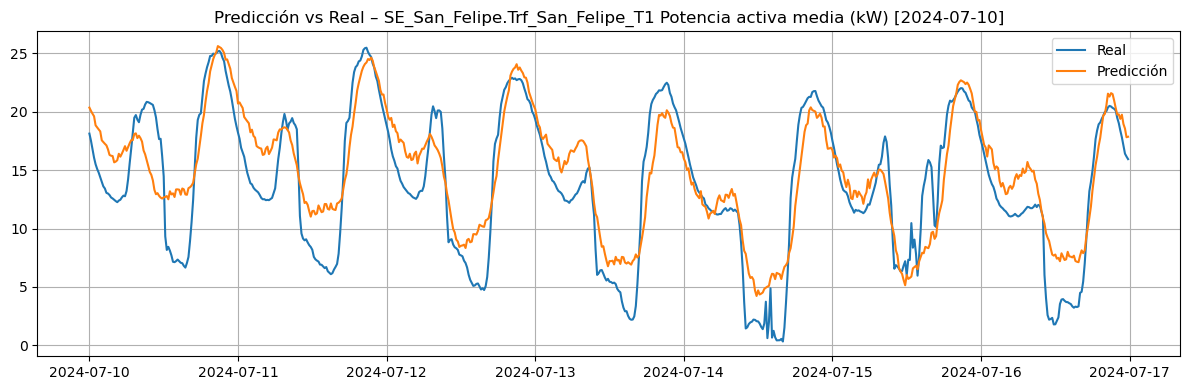


Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.698872    2.100440   20.876113  1.594804   2.027954   
1        2025-01-13   2.093034    2.586414   35.629811  1.786358   2.492769   
2        2024-10-21   3.236340    4.074346   30.930464  2.985878   3.829238   
3        2024-07-10   3.637485    4.725198   23.087810  2.591052   3.080990   

   MAPE_test variable  
0  15.935949        P  
1  28.368862        P  
2  27.338713        P  
3  33.190525        P  


In [33]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columna objetivo (Potencia activa)
columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'

# Estación meteorológica asociada
nombre_estacion = 'Los Andes'

# Lista de resultados
resultados_p = []

# Loop por fecha
for fecha in fechas_test:
    print(f"\nEvaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_parametros_estacion_meteo_componentes(
        df_transformadores,
        columna_objetivo=columna_p,
        fecha_inicio_test=fecha,
        df_meteorologico=df_meteorologico,
        nombre_estacion=nombre_estacion
    )
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

# Convertir a DataFrame
df_resultados_p = pd.DataFrame(resultados_p)

# Mostrar resultados
print("\nResultados Potencia Activa (P):")
print(df_resultados_p)

## Incluir si es laboral o fin de semana como regresor

In [35]:
def ejecutar_modelo_prophet_laboral_finsemana(df, columna_objetivo, fecha_inicio_test, df_meteorologico, nombre_estacion):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna_objetivo]].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna_objetivo: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Añadir columna es_fin_semana (sábado=5 o domingo=6)
    df_prophet['es_fin_semana'] = df_prophet['ds'].dt.weekday.isin([5, 6]).astype(int)

    # Cargar temperatura desde estación meteorológica
    df_meteo = df_meteorologico[df_meteorologico['Estacion'] == nombre_estacion].copy()
    df_meteo['Date & Time'] = pd.to_datetime(df_meteo['Date & Time'])

    df_prophet = df_prophet.merge(
        df_meteo[['Date & Time', 'Temp - °C']],
        left_on='ds', right_on='Date & Time', how='left'
    ).drop(columns=['Date & Time'])

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Filtrar segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet
    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        uncertainty_samples=0
    )
    m.add_regressor('Temp - °C')
    m.add_regressor('es_fin_semana')

    # Entrenar modelo
    m.fit(df_train[['ds', 'y', 'Temp - °C', 'es_fin_semana']])

    # Construir future
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds', 'Temp - °C', 'es_fin_semana']], on='ds', how='left')

    # Predecir
    forecast = m.predict(future)

    # Separar resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico test
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna_objetivo} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



Evaluando P para 2025-03-17


21:00:50 - cmdstanpy - INFO - Chain [1] start processing
21:01:02 - cmdstanpy - INFO - Chain [1] done processing


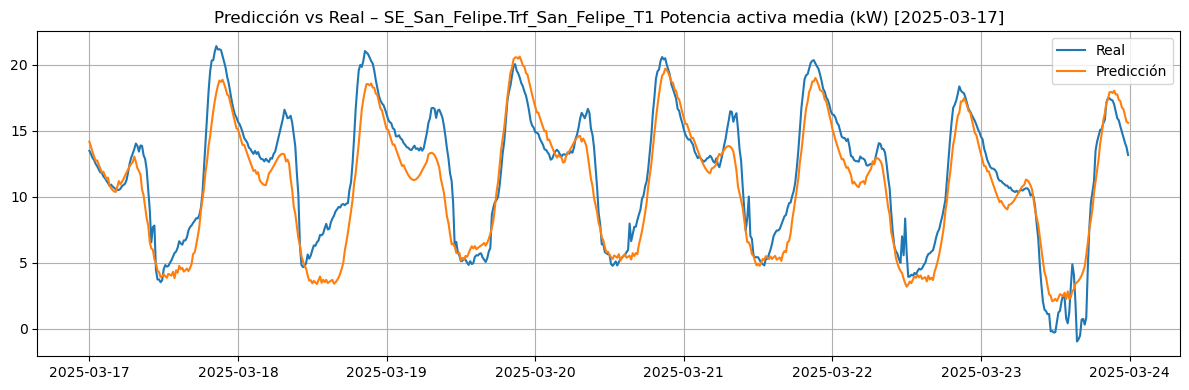


Evaluando P para 2025-01-13


21:01:03 - cmdstanpy - INFO - Chain [1] start processing
21:01:12 - cmdstanpy - INFO - Chain [1] done processing


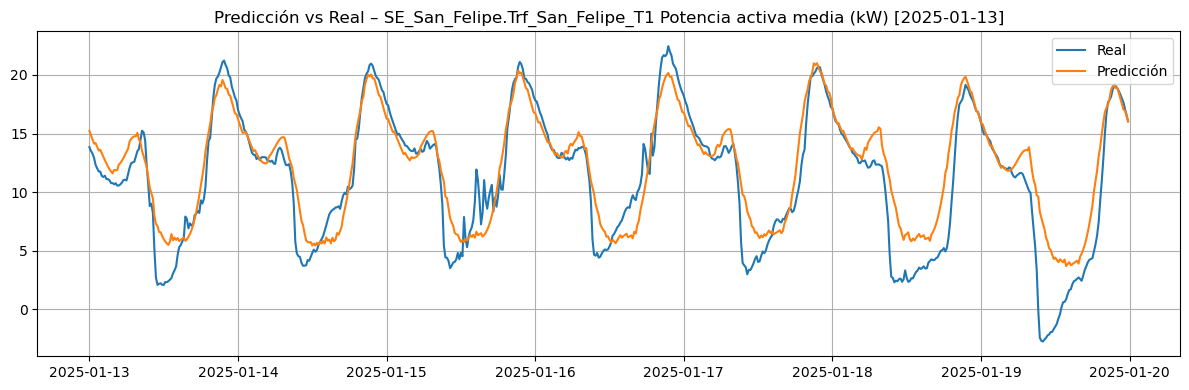


Evaluando P para 2024-10-21


21:01:13 - cmdstanpy - INFO - Chain [1] start processing
21:01:22 - cmdstanpy - INFO - Chain [1] done processing


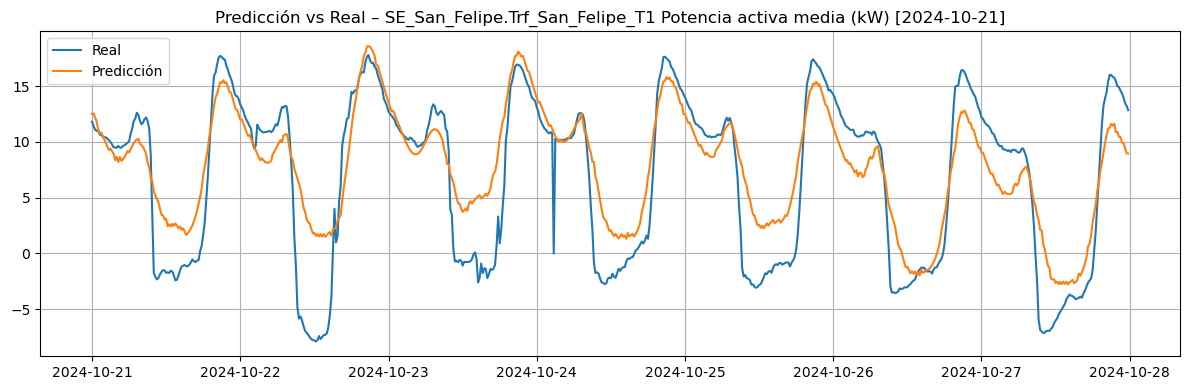


Evaluando P para 2024-07-10


21:01:23 - cmdstanpy - INFO - Chain [1] start processing
21:01:24 - cmdstanpy - INFO - Chain [1] done processing


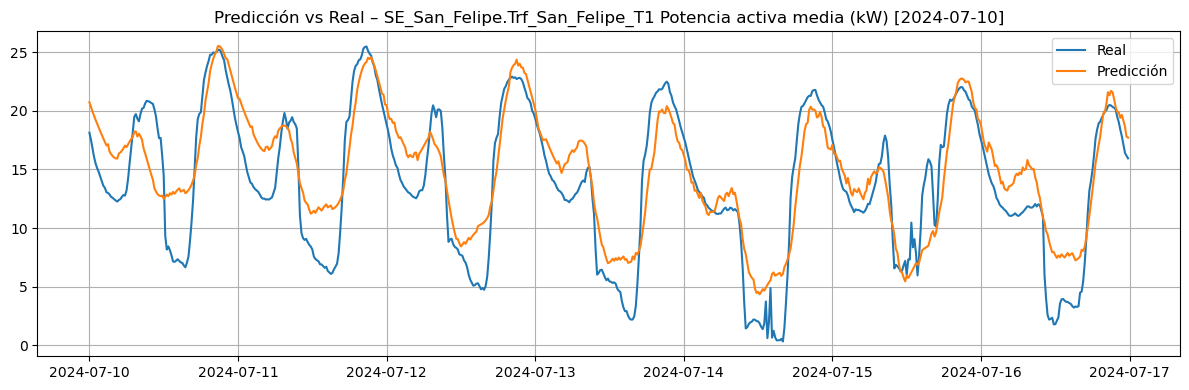


Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.740427    2.135540   21.189978  1.575086   2.005161   
1        2025-01-13   2.107931    2.586851   35.391652  1.778711   2.484890   
2        2024-10-21   3.238289    4.061815   31.156863  2.985289   3.829425   
3        2024-07-10   3.631519    4.709468   23.135999  2.611168   3.095789   

   MAPE_test variable  
0  15.736362        P  
1  28.202087        P  
2  27.375803        P  
3  33.681039        P  


In [36]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columna objetivo
columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'

# Estación meteorológica asociada
nombre_estacion = 'Los Andes'

# Lista de resultados
resultados_p = []

# Loop por fecha
for fecha in fechas_test:
    print(f"\nEvaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_laboral_finsemana(
        df_transformadores,
        columna_objetivo=columna_p,
        fecha_inicio_test=fecha,
        df_meteorologico=df_meteorologico,
        nombre_estacion=nombre_estacion
    )
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

# Convertir a DataFrame
df_resultados_p = pd.DataFrame(resultados_p)

# Mostrar resultados
print("\nResultados Potencia Activa (P):")
print(df_resultados_p)

## Regresor de horas puntas y hora valle

In [38]:
def ejecutar_modelo_prophet_con_hora_valle(df, columna_objetivo, fecha_inicio_test, df_meteorologico, nombre_estacion):
    import numpy as np
    from prophet import Prophet
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error, mean_squared_error

    # Preparar datos
    df_prophet = df[['Fecha y hora', columna_objetivo]].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna_objetivo: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Cargar temperatura desde estación meteorológica
    df_meteo = df_meteorologico[df_meteorologico['Estacion'] == nombre_estacion].copy()
    df_meteo['Date & Time'] = pd.to_datetime(df_meteo['Date & Time'])

    df_prophet = df_prophet.merge(
        df_meteo[['Date & Time', 'Temp - °C']],
        left_on='ds', right_on='Date & Time', how='left'
    ).drop(columns=['Date & Time'])

    # Regresores horarios: hora_sin, hora_cos, es_valle
    df_prophet['hora'] = df_prophet['ds'].dt.hour
    df_prophet['hora_sin'] = np.sin(2 * np.pi * df_prophet['hora'] / 24)
    df_prophet['hora_cos'] = np.cos(2 * np.pi * df_prophet['hora'] / 24)
    df_prophet['es_valle'] = df_prophet['hora'].isin([2,3,4,5,6]).astype(int)

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Filtrar segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet
    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        uncertainty_samples=0
    )
    regresores = ['Temp - °C', 'hora_sin', 'hora_cos', 'es_valle']
    for reg in regresores:
        m.add_regressor(reg)

    # Entrenar
    m.fit(df_train[['ds', 'y'] + regresores])

    # Construir future
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds'] + regresores], on='ds', how='left')

    forecast = m.predict(future)

    # Resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = np.mean(np.abs((df_train_eval['y'] - df_train_eval['yhat']) / df_train_eval['y'])) * 100

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = np.mean(np.abs((df_test_eval['y'] - df_test_eval['yhat']) / df_test_eval['y'])) * 100

    # Gráfico
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna_objetivo} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



Evaluando P para 2025-03-17


21:01:25 - cmdstanpy - INFO - Chain [1] start processing
21:01:38 - cmdstanpy - INFO - Chain [1] done processing


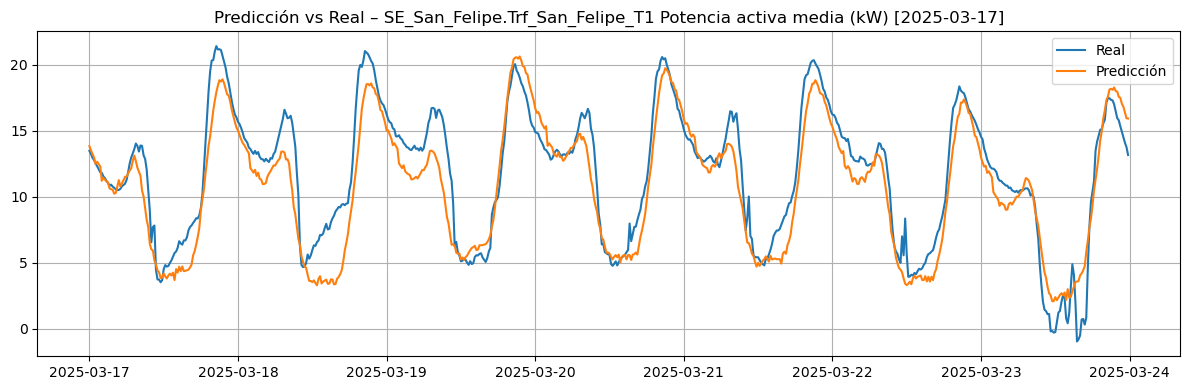


Evaluando P para 2025-01-13


21:01:39 - cmdstanpy - INFO - Chain [1] start processing
21:01:49 - cmdstanpy - INFO - Chain [1] done processing


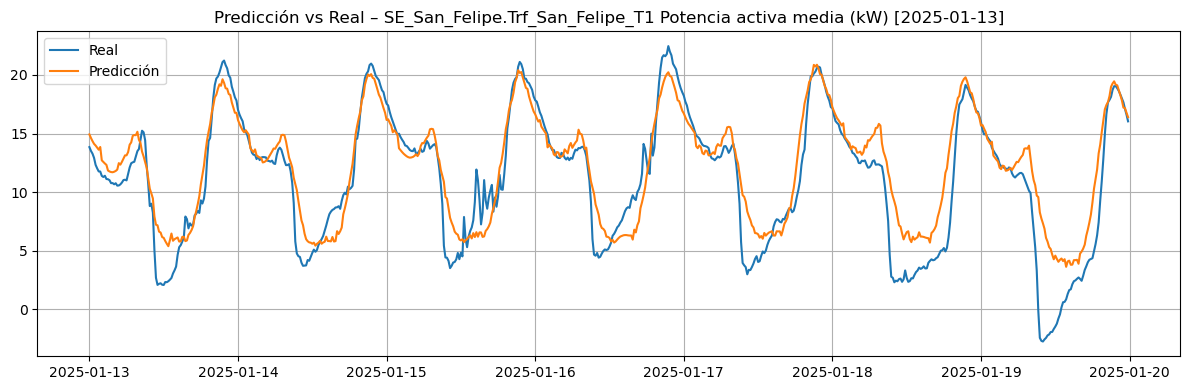


Evaluando P para 2024-10-21


21:01:50 - cmdstanpy - INFO - Chain [1] start processing
21:01:58 - cmdstanpy - INFO - Chain [1] done processing


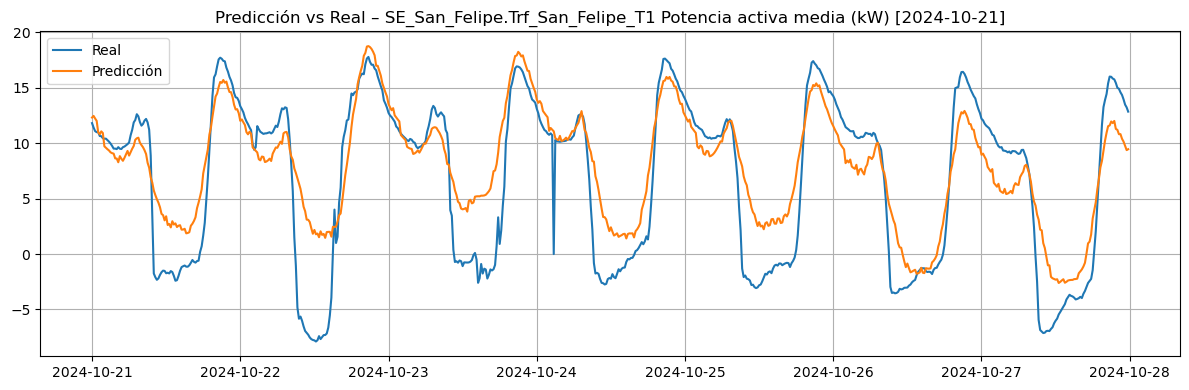


Evaluando P para 2024-07-10


21:01:59 - cmdstanpy - INFO - Chain [1] start processing
21:02:00 - cmdstanpy - INFO - Chain [1] done processing


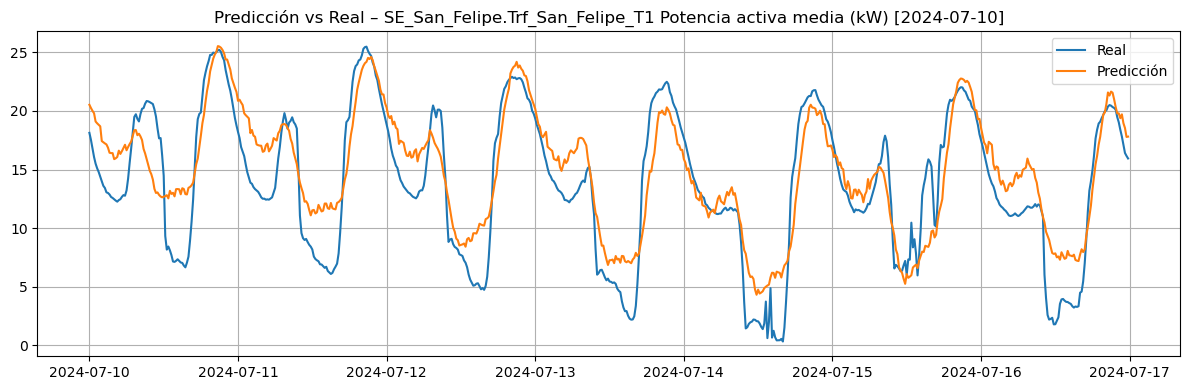


Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train   MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.731938    2.127512    36.325294  1.584017   2.018899   
1        2025-01-13   2.105944    2.579028  1731.134612  1.786813   2.494117   
2        2024-10-21   3.225825    4.066130   179.046938  2.993935   3.867576   
3        2024-07-10   3.632382    4.718461          inf  2.600759   3.097327   

   MAPE_test variable  
0  31.043399        P  
1  54.837059        P  
2        inf        P  
3  46.482689        P  


In [39]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columna objetivo (Potencia activa)
columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'

# Estación meteorológica asociada
nombre_estacion = 'Los Andes'

# Lista de resultados
resultados_p = []

# Loop por fecha
for fecha in fechas_test:
    print(f"\nEvaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_con_hora_valle(
        df_transformadores,
        columna_objetivo=columna_p,
        fecha_inicio_test=fecha,
        df_meteorologico=df_meteorologico,
        nombre_estacion=nombre_estacion
    )
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

# Convertir a DataFrame
df_resultados_p = pd.DataFrame(resultados_p)

# Mostrar resultados
print("\nResultados Potencia Activa (P):")
print(df_resultados_p)

## Meteo + 3 años 

In [41]:
def calcular_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-6))) * 100

In [42]:
def ejecutar_modelo_prophet_parametros_meteo(df, columna_objetivo, fecha_inicio_test, df_meteorologico, nombre_estacion):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna_objetivo]].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna_objetivo: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Añadir temperatura desde df_meteorologico
    df_meteorologico['Date & Time'] = pd.to_datetime(df_meteorologico['Date & Time'])
    df_prophet = df_prophet.merge(df_meteorologico[['Date & Time', 'Temp - °C']],
                                  left_on='ds', right_on='Date & Time', how='left').drop(columns=['Date & Time'])
    df_prophet.rename(columns={'Temp - °C': 'temp'}, inplace=True)

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Segmentos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet con valores por defecto
    m = Prophet(
        daily_seasonality=False,
        weekly_seasonality=False,
        yearly_seasonality=False
    )
    m.add_seasonality(name='daily_hour', period=1, fourier_order=20)
    m.add_seasonality(name='weekly_custom', period=7, fourier_order=30)
    m.add_seasonality(name='yearly_custom', period=365.25, fourier_order=10)

    # Agregar solo temperatura como regresor
    m.add_regressor('temp')

    # Entrenar
    m.fit(df_train[['ds', 'y', 'temp']])

    # Construir future
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds', 'temp']], on='ds', how='left')

    forecast = m.predict(future)

    # Resultados
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna_objetivo} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }



Evaluando P para 2025-03-17


21:02:02 - cmdstanpy - INFO - Chain [1] start processing
21:02:27 - cmdstanpy - INFO - Chain [1] done processing


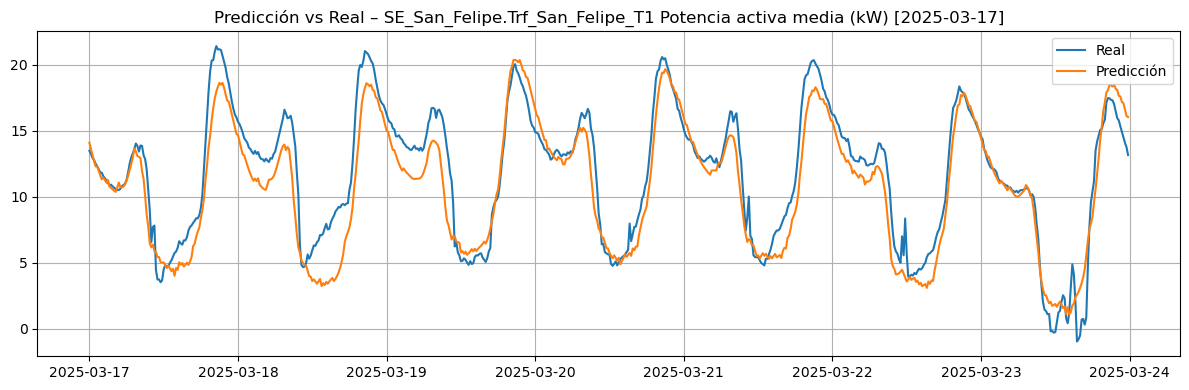


Evaluando P para 2025-01-13


21:02:30 - cmdstanpy - INFO - Chain [1] start processing
21:02:47 - cmdstanpy - INFO - Chain [1] done processing


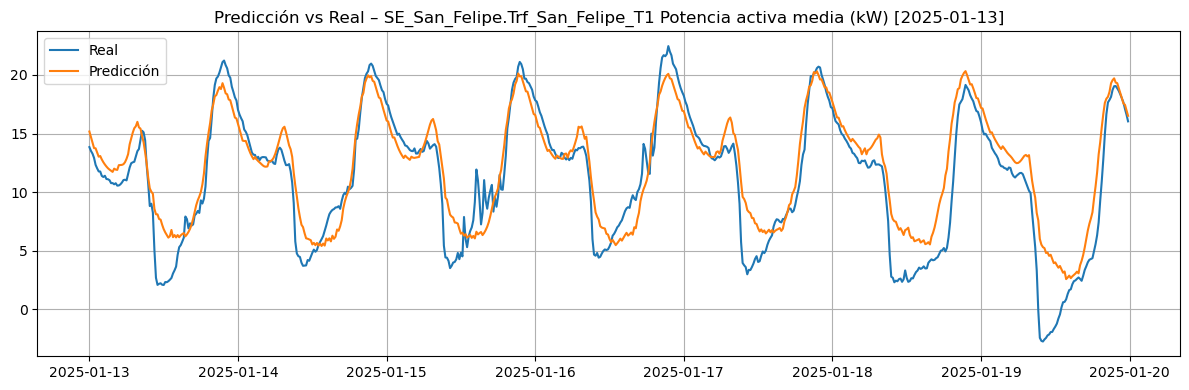


Evaluando P para 2024-10-21


21:02:49 - cmdstanpy - INFO - Chain [1] start processing
21:03:14 - cmdstanpy - INFO - Chain [1] done processing


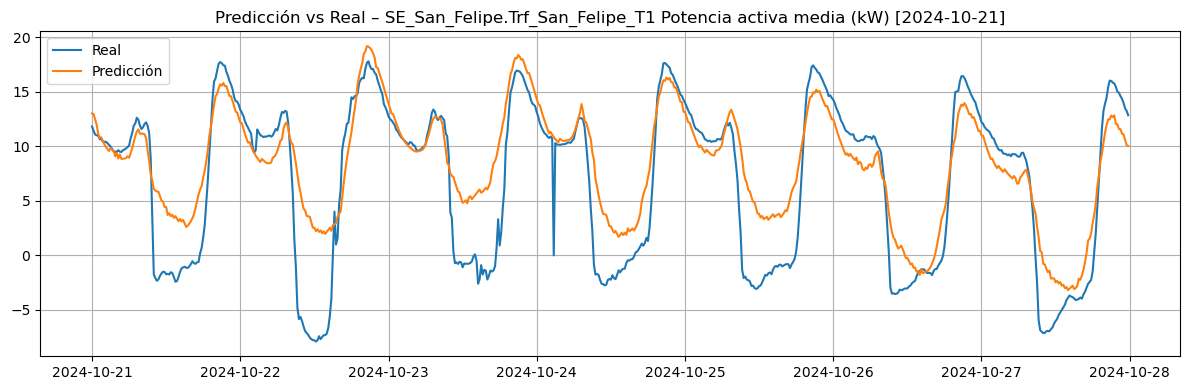


Evaluando P para 2024-07-10


21:03:15 - cmdstanpy - INFO - Chain [1] start processing
21:03:17 - cmdstanpy - INFO - Chain [1] done processing


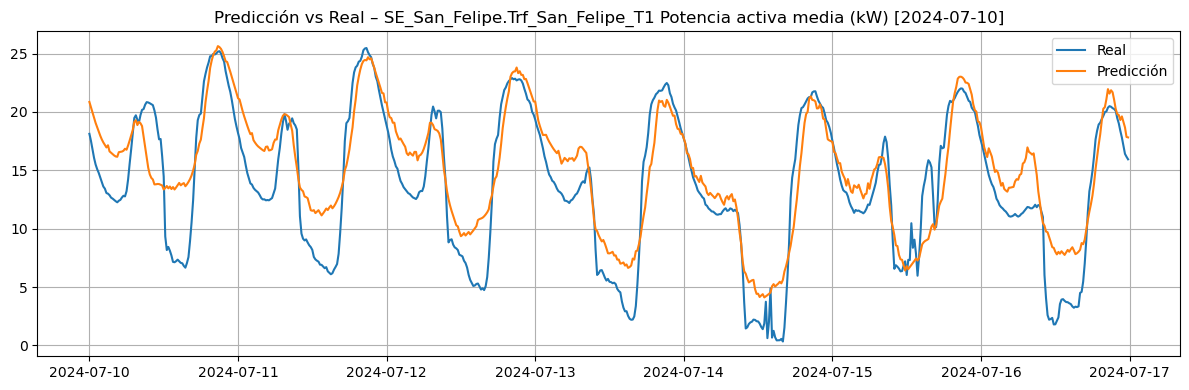


 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train    MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.717247    2.076842  3.215708e+01  1.494546   1.916228   
1        2025-01-13   2.149873    2.570806  2.002525e+03  1.836246   2.400529   
2        2024-10-21   3.103803    3.892415  1.874140e+02  2.958308   3.968596   
3        2024-07-10   3.511238    4.597528  5.712618e+07  2.552075   3.068771   

      MAPE_test variable  
0  2.678889e+01        P  
1  4.961805e+01        P  
2  1.613992e+06        P  
3  4.440599e+01        P  


In [43]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'

# Nombre de estación meteorológica asociada al transformador
nombre_estacion = 'Los Andes'

# Resultados
resultados_p = []

for fecha in fechas_test:
    print(f"\nEvaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_parametros_meteo(
        df_transformadores, columna_p, fecha, df_andes_union, nombre_estacion
    )
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

# Convertir a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)

# Mostrar resultados
print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)


## Dias de calentamiento y enfriamiento, estación, días de sol sin meteo

In [45]:
def ejecutar_modelo_prophet_cdd_pmgd_proxy(
    df,
    columna,
    fecha_inicio_test,
    df_meteorologico,
    nombre_estacion,
    col_temp="Temp - °C",
    col_cdd="Días-grado de enfriamiento",
    col_hdd="Días-grado de calentamiento",
    mostrar_grafico=False,
    ruta_guardado=None,
):
    """Versión de Prophet con:
    - Lectura de CDD/HDD desde df_meteorologico.
    - Proxy solar estacional ajustado por estación del año en Chile.
    - Seasonality multiplicativa y Fourier daily/weekly/yearly.
    """

    # Preparar datos base
    df_prophet = df[["Fecha y hora", columna, "estacion"]].dropna().rename(columns={
        "Fecha y hora": "ds", columna: "y"
    })
    df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

    # Preparar meteo (con CDD y HDD incluidos)
    meteo = df_meteorologico[df_meteorologico["Estacion"] == nombre_estacion].copy()
    meteo["Date & Time"] = pd.to_datetime(meteo["Date & Time"])
    meteo = meteo[["Date & Time", col_cdd, col_hdd]].rename(columns={
        "Date & Time": "ds",
        col_cdd: "CDD",
        col_hdd: "HDD"
    })
    meteo["CDD2"] = meteo["CDD"] ** 2
    meteo["HDD2"] = meteo["HDD"] ** 2

    # Merge a df_prophet
    df_prophet = df_prophet.merge(meteo, on="ds", how="left")

    # Proxy solar estacional
    def _pmgd_prob(row):
        hora_decimal = row["ds"].hour + row["ds"].minute / 60.0
        est = row["estacion"].lower()
        if est == "verano":
            return int(8 <= hora_decimal <= 19)
        elif est == "invierno":
            return int(10 <= hora_decimal <= 17)
        else:
            return int(9 <= hora_decimal <= 18)

    df_prophet["pmgd_horario_probable"] = df_prophet.apply(_pmgd_prob, axis=1)

    # Dummies estación
    dummies_estacion = pd.get_dummies(df_prophet["estacion"], prefix="estacion")
    df_prophet = pd.concat([df_prophet, dummies_estacion], axis=1)

    regresores = ["CDD", "HDD", "CDD2", "HDD2", "pmgd_horario_probable"] + dummies_estacion.columns.tolist()

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    df_test = df_prophet[(df_prophet["ds"] >= fecha_inicio_test) & (df_prophet["ds"] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet["ds"] >= fecha_inicio_train_eval) & (df_prophet["ds"] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet["ds"] <= fecha_fin_train_eval].copy()

    # Prophet
    m = Prophet(
        daily_seasonality=False,
        weekly_seasonality=False,
        yearly_seasonality=False,
        seasonality_mode="multiplicative",
        n_changepoints=80,
        changepoint_prior_scale=0.1,
        seasonality_prior_scale=10,
    )

    m.add_seasonality(name="daily_15m", period=1, fourier_order=48)
    m.add_seasonality(name="weekly_custom", period=7, fourier_order=30)
    m.add_seasonality(name="yearly_custom", period=365.25, fourier_order=10)

    for reg in regresores:
        m.add_regressor(reg)

    m.fit(df_train[["ds", "y"] + regresores])

    future = pd.concat([df_train_eval[["ds"]], df_test[["ds"]]]).drop_duplicates().sort_values("ds")
    future = future.merge(df_prophet[["ds"] + regresores], on="ds", how="left")

    forecast = m.predict(future)
    forecast_train_eval = forecast[forecast["ds"].isin(df_train_eval["ds"])]
    forecast_test = forecast[forecast["ds"].isin(df_test["ds"])]

    df_train_eval = df_train_eval.set_index("ds").join(
        forecast_train_eval.set_index("ds")[["yhat"]], how="inner"
    )
    df_test_eval = df_test.set_index("ds").join(
        forecast_test.set_index("ds")[["yhat"]], how="inner"
    )

    mae_train = mean_absolute_error(df_train_eval["y"], df_train_eval["yhat"])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval["y"], df_train_eval["yhat"]))
    mape_train = calcular_mape(df_train_eval["y"], df_train_eval["yhat"])

    mae_test = mean_absolute_error(df_test_eval["y"], df_test_eval["yhat"])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval["y"], df_test_eval["yhat"]))
    mape_test = calcular_mape(df_test_eval["y"], df_test_eval["yhat"])

    resultados_metricas = {
        "transformador": columna,
        "fecha_inicio_test": fecha_inicio_test.date(),
        "MAE_train": mae_train,
        "RMSE_train": rmse_train,
        "MAPE_train": mape_train,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test,
        "MAPE_test": mape_test,
    }

    if mostrar_grafico or ruta_guardado:
        plt.figure(figsize=(12, 4))
        plt.plot(df_test_eval.index, df_test_eval["y"], label="Real")
        plt.plot(df_test_eval.index, df_test_eval["yhat"], label="Predicción")
        plt.title(f"{columna} [{fecha_inicio_test.date()}]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        if ruta_guardado:
            plt.savefig(ruta_guardado)
        if mostrar_grafico:
            plt.show()
        else:
            plt.close()

    df_test_eval = df_test_eval.reset_index()
    df_test_eval["transformador"] = columna
    df_test_eval = df_test_eval.rename(columns={"y": "real", "yhat": "predicho"})

    return resultados_metricas, df_test_eval


Evaluando P para 2025-03-17


21:03:20 - cmdstanpy - INFO - Chain [1] start processing
21:03:46 - cmdstanpy - INFO - Chain [1] done processing


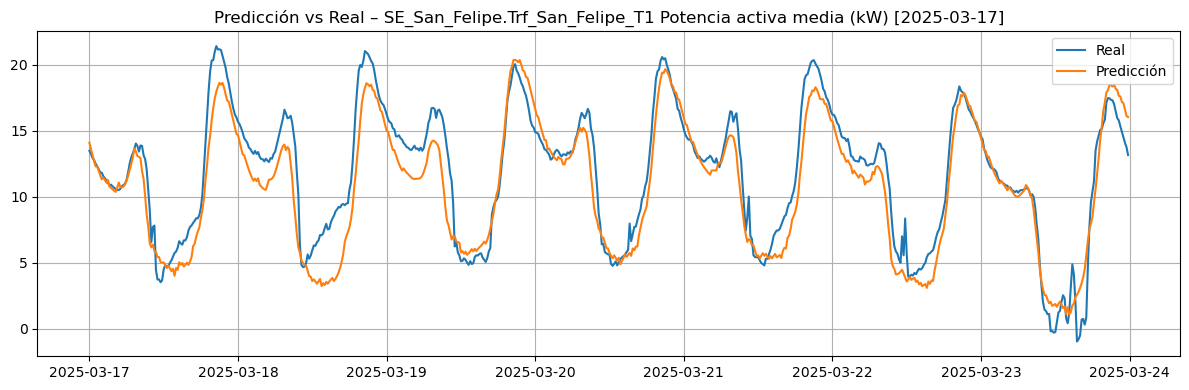


Evaluando P para 2025-01-13


21:03:48 - cmdstanpy - INFO - Chain [1] start processing
21:04:06 - cmdstanpy - INFO - Chain [1] done processing


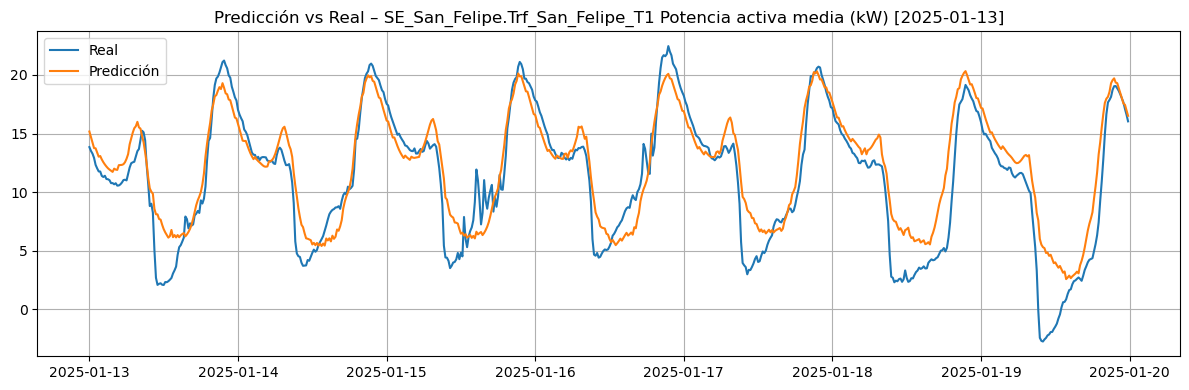


Evaluando P para 2024-10-21


21:04:08 - cmdstanpy - INFO - Chain [1] start processing
21:04:32 - cmdstanpy - INFO - Chain [1] done processing


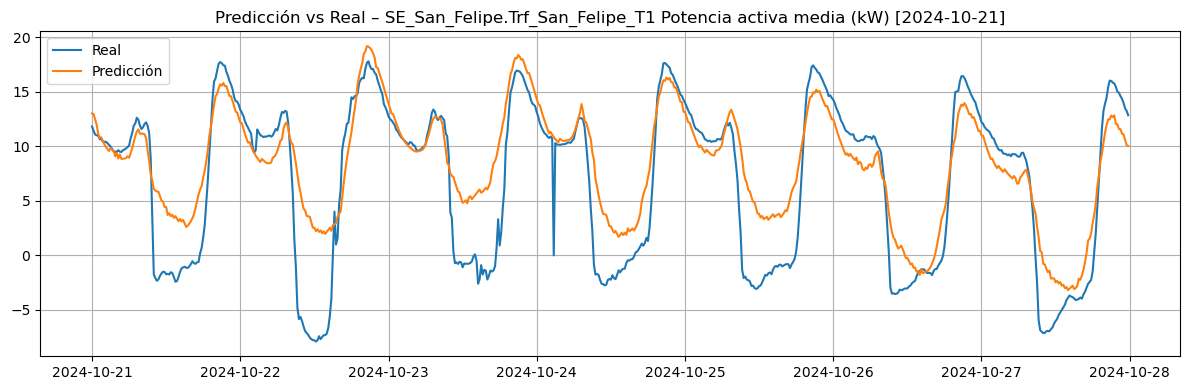


Evaluando P para 2024-07-10


21:04:34 - cmdstanpy - INFO - Chain [1] start processing
21:04:36 - cmdstanpy - INFO - Chain [1] done processing


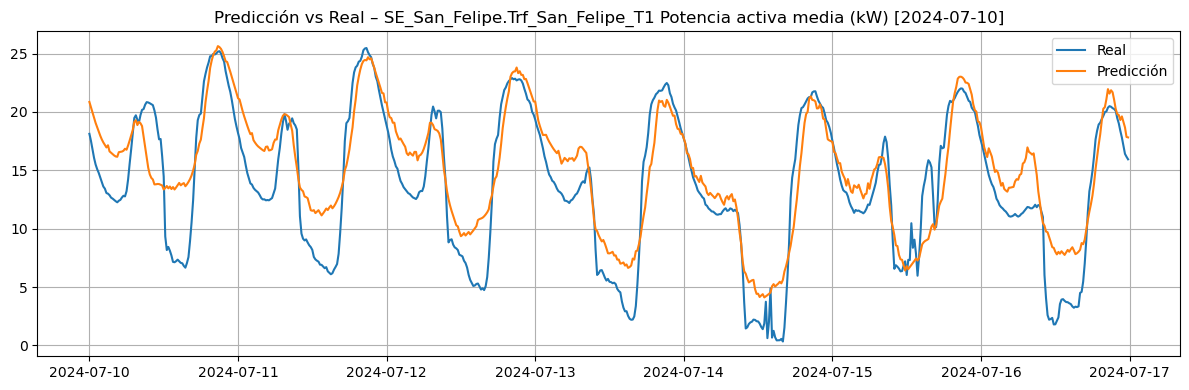


 Resultados Potencia Activa (P):
  fecha_inicio_test  MAE_train  RMSE_train    MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   1.717247    2.076842  3.215708e+01  1.494546   1.916228   
1        2025-01-13   2.149873    2.570806  2.002525e+03  1.836246   2.400529   
2        2024-10-21   3.103803    3.892415  1.874140e+02  2.958308   3.968596   
3        2024-07-10   3.511238    4.597528  5.712618e+07  2.552075   3.068771   

      MAPE_test variable  
0  2.678889e+01        P  
1  4.961805e+01        P  
2  1.613992e+06        P  
3  4.440599e+01        P  


In [46]:
# Fechas de test
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

# Columnas objetivo
columna_p = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)'
columna_q = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'

# Nombre de estación meteorológica asociada al transformador
nombre_estacion = 'Los Andes'

# Resultados
resultados_p = []
resultados_q = []

for fecha in fechas_test:
    print(f"\nEvaluando P para {fecha}")
    resultado_p = ejecutar_modelo_prophet_parametros_meteo(
        df_transformadores, columna_p, fecha, df_andes_union, nombre_estacion
    )
    resultado_p['fecha_inicio_test'] = fecha
    resultado_p['variable'] = 'P'
    resultados_p.append(resultado_p)

# Convertir a DataFrames
df_resultados_p = pd.DataFrame(resultados_p)

# Mostrar resultados
print("\n Resultados Potencia Activa (P):")
print(df_resultados_p)
